In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cancer_classification.csv')

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

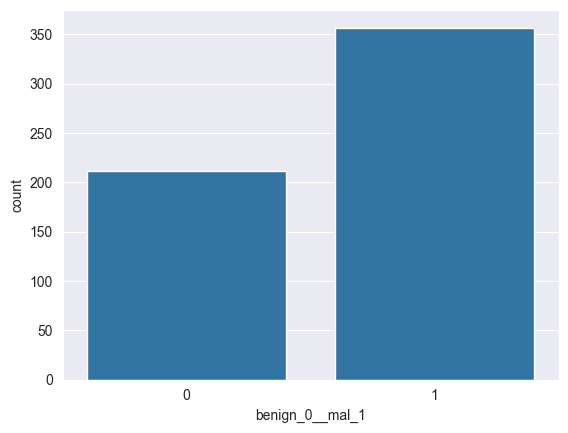

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

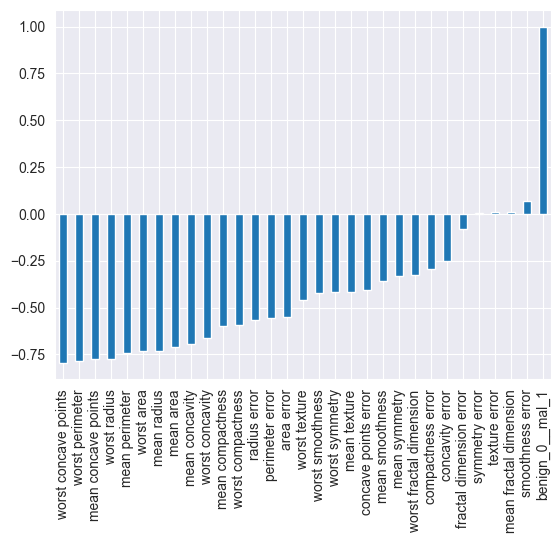

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

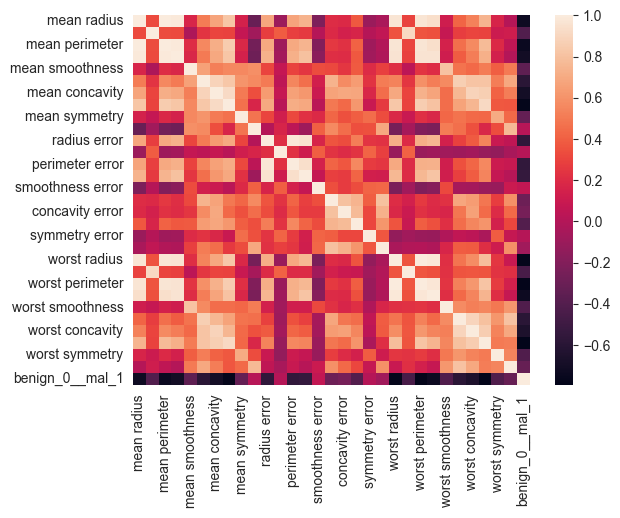

In [10]:
sns.heatmap(df.corr())

In [11]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#because of binary calssification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6809 - val_loss: 0.6563
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6350 - val_loss: 0.6096
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5863 - val_loss: 0.5569
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5338 - val_loss: 0.4988
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4783 - val_loss: 0.4428
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4250 - val_loss: 0.3907
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3744 - val_loss: 0.3406
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3308 - val_loss: 0.2989
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2951 - val_loss: 0.2619
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2647 - val_loss: 0.2344
Epoch 11

<Axes: >

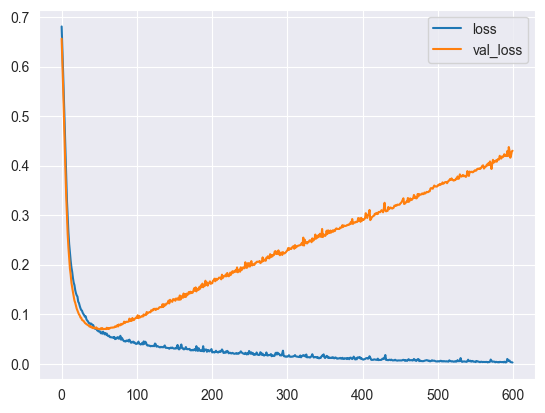

In [21]:
pd.DataFrame(model.history.history).plot()

In [22]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#because of binary calssification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [25]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6712 - val_loss: 0.6590
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6389 - val_loss: 0.6228
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6039 - val_loss: 0.5838
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5630 - val_loss: 0.5420
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5248 - val_loss: 0.5032
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4875 - val_loss: 0.4655
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4549 - val_loss: 0.4309
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4220 - val_loss: 0.3945
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3889 - val_loss: 0.3626
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3580 - val_loss: 0.3296
Epoch 11

<Axes: >

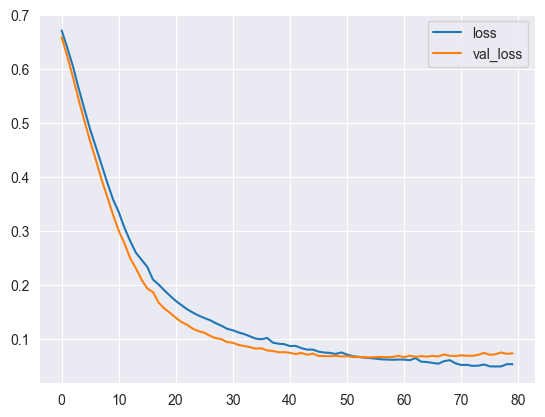

In [26]:
pd.DataFrame(model.history.history).plot()

In [43]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#because of binary calssification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [45]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7127 - val_loss: 0.6797
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6950 - val_loss: 0.6583
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6819 - val_loss: 0.6434
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6598 - val_loss: 0.6270
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6403 - val_loss: 0.6110
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.5909
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6042 - val_loss: 0.5696
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5873 - val_loss: 0.5452
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5630 - val_loss: 0.5146
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5495 - val_loss: 0.4851
Epoch 11

<Axes: >

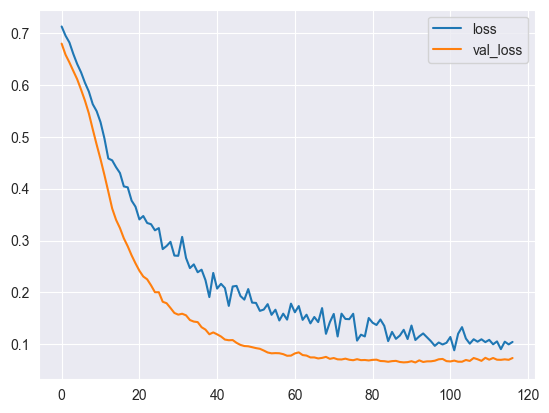

In [46]:
pd.DataFrame(model.history.history).plot()

In [50]:
# y_pred = model.predict(X_test)
# classes = np.argmax(y_pred, axis=1)

classes = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143


In [52]:
print(confusion_matrix(y_test, classes))

[[52  2]
 [ 0 89]]
